In [67]:
import csv
import pandas as pd
from brrr import skrrrahh as skr
import time
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [213]:
# Reads in the smaller Total Counts dataset
with open('googlebooks-eng-all-totalcounts-20120701.txt') as f:
    reader = csv.reader(f, delimiter="\t")
    d = list(reader)[0]

for i in range(len(d)):
    d[i] = d[i].split(",")

total_counts = pd.DataFrame(d,columns = ['year','total_match_count', 'page_count', 'volume_count']).drop([0,426]).drop(columns=['page_count','volume_count'])
total_counts['year'] = total_counts['year'].astype(int)
total_counts['total_match_count'] = total_counts['total_match_count'].astype(int)

In [83]:
# Sets the index of the dataset to years to be matched on later
total_counts = total_counts.set_index('year')

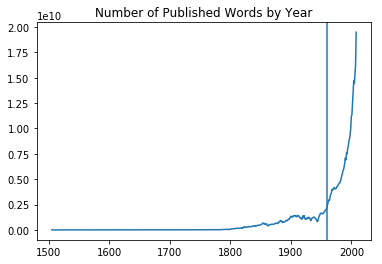

In [228]:
# Plots the total number of words used over time
plt.plot(total_counts['year'],total_counts['total_match_count'])
plt.axvline(x=1959)
plt.title("Number of Published Words by Year")
plt.show()

In [4]:
# Reads in the larger n-gram dataset for all "1"s of n length equal to 1
with open('1grams-1') as f:
    reader = csv.reader(f, delimiter="\t")
    d = list(reader)
    
df = pd.DataFrame(d)
df.columns = ['1gram','year','occurrence','books']

In [227]:
# Establishes a test dataframe so that changes can be made inline
# and the original dataframe recovered without requiring the lengthy
# process of reading the file into Pandas.
test = df

# Parses the 27,000,000+ row dataset down to a more managable
# 175,000 row dataset by looking for only the year values.

# Only allows n-grams of length four.
short_tester = test[test['1gram'].apply(lambda x: len(x) == 4)]

# Removes all n-grams with non-numeric characters.
shorter_tester = short_tester[pd.to_numeric(short_tester['1gram'], 
                                            errors='coerce').notnull()]

# Changes the years column from string to integers so inequality
# operations can be run.
shorter_tester['year'] = pd.to_numeric(shorter_tester['year'])
shortest_tester = shorter_tester.loc[shorter_tester['year'] > 1874]
shortest_tester['occurrence'] = pd.to_numeric(shorter_tester['occurrence'])

# Merges our Total Counts dataset and the n-grams dataset
counts_and_1grams = shortest_tester.merge(total_counts,on = 'year')

In [112]:
# New column to show our frequency/rate; dividing match 
# count by total count for each year
counts_and_1grams['freq'] = counts_and_1grams['occurrence']/counts_and_1grams['total_match_count'] 
counts_and_1grams['freq_scaled']=counts_and_1grams['freq']*10000
counts_and_1grams = counts_and_1grams.sort_values(by=['1gram', 'year'])

In [208]:
# Prepares the data for graphing

x = counts_and_1grams[counts_and_1grams['1gram'] == '1883']['year']
y1=counts_and_1grams[counts_and_1grams['1gram'] == '1883']['freq_scaled']
y2=counts_and_1grams[counts_and_1grams['1gram'] == '1910']['freq_scaled']
y3=counts_and_1grams[counts_and_1grams['1gram'] == '1950']['freq_scaled']

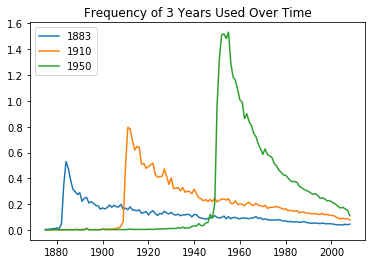

In [229]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(['1883', '1910', '1950'], loc='upper left')
plt.title("Frequency of 3 Years Used Over Time")
plt.show()

In [64]:
# Creates a copy for testing purposes
all_test = all_obs

In [193]:
all_test["freq"] = freq

In [231]:
xy1883 = all_test.loc[all_test['1gram'] == '1883']
xy1910 = all_test.loc[all_test['1gram'] == '1910']
xy1950 = all_test.loc[all_test['1gram'] == '1950']

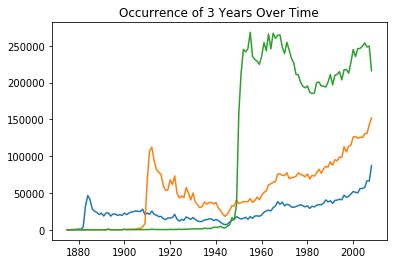

In [232]:
plt.plot(xy1883['year'],xy1883['occurrence'])
plt.plot(xy1910['year'],xy1910['occurrence'])
plt.plot(xy1950['year'],xy1950['occurrence'])
plt.title("Occurrence of 3 Years Over Time")
plt.show()

In [173]:
# Creates a range of years to function as x-axis for half lives
year_range = range(1876,1976)

In [181]:
half_lives = []

for year in year_range:
    peak_year = counts_and_1grams.loc[counts_and_1grams[(counts_and_1grams['year']>=year) & (counts_and_1grams["1gram"]==str(year))]['freq'].idxmax()]['year']
    half_life_freq = counts_and_1grams.loc[counts_and_1grams[(counts_and_1grams['year']>=year) & (counts_and_1grams["1gram"]==str(year))]['freq'].idxmax()]['freq']/2
    half_life = counts_and_1grams[(counts_and_1grams['year']>peak_year)&(counts_and_1grams['freq']<=half_life_freq)&(counts_and_1grams["1gram"]==str(year))]['year'].min()-peak_year
    half_lives.append(half_life)

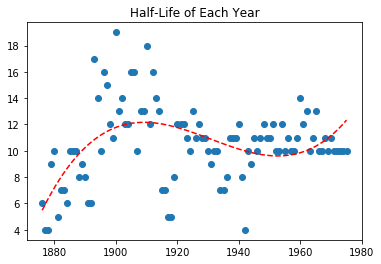

In [233]:
plt.scatter(year_range,half_lives)
# Different polynomial values tested to prevent overfitting
z = np.polyfit(year_range, half_lives, 3)
p = np.poly1d(z)
plt.plot(year_range,p(year_range),"r--")
plt.title("Half-Life of Each Year")
plt.show()

In [241]:
# Dataframe version of the graph above to see exact vales for extrema
df = pd.DataFrame([year_range,half_lives])
df.T.iloc[24:67]

,0,1
24,1900,19
25,1901,13
26,1902,14
27,1903,12
28,1904,12
29,1905,16
30,1906,16
31,1907,10
32,1908,13
33,1909,13
